#### Imports and Installs

In [13]:
# Installs
!pip install -q rich markdown-it-py tensorflow-cpu tensorflow gym==0.21.0 torch==2.0.1 numpy keras python-binance seaborn ipykernel stable-baselines3[extra] tensorboard scikit-learn

In [14]:
# Imports
# System utils 
import os
from IPython.core.interactiveshell import InteractiveShell
import time
import importlib
import sys

# Data Processing
import numpy as np
import pandas as pd

# Environment
import gym
from gym import spaces

# Plotting
import matplotlib.pyplot as plt 
from scipy.signal import savgol_filter

# Reinforcement Learning
import tensorflow as tf
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C
from stable_baselines3 import DQN
from stable_baselines3 import PPO
import logging
from stockenv import CryptoEnvironment

# NB Setup
InteractiveShell.ast_node_interactivity = "all"
logging.basicConfig(level=logging.INFO)
plt.style.use('dark_background')

#### Load and Visualize Data

In [15]:
# Load data from disk
# Make sure there is lots of data as padding is finnicky due to batch normalization and forward-looking reward calculation
data = pd.read_pickle('./data/measurement.pickle')  

,Open,High,Low,Close,Volume,taker_buy_quote_asset_volume,AROON,%D,KCU,KCL,FI,DIFFRSI,SRSI,TRIX_HIST,AO
open_time,,,,,,,,,,,,,,,
1641028200000,47142.39,47142.39,47142.39,47142.39,0.000000,0.000000,-50.0,25.179543,47170.9185,47170.9185,-29.604093,2.268637,0.921130,0.000172,10.694618
1641028500000,47142.39,47142.39,47142.02,47142.02,0.003924,0.000000,-50.0,28.406955,47176.5515,47175.0715,-30.705597,2.268637,0.870136,0.000120,8.697912
1641028800000,47142.02,47142.02,47142.02,47142.02,0.000000,0.000000,-50.0,28.360903,47179.2515,47179.2515,-36.811017,2.268637,0.898510,0.000091,12.269794
1641029100000,47103.27,47124.42,47103.27,47124.42,0.006091,286.978747,-50.0,26.124242,47222.5195,47137.9195,-21.958556,1.749303,1.000000,-0.000079,15.217794
1641029400000,47112.96,47118.73,47112.96,47118.73,0.031840,0.000000,-50.0,23.225421,47190.9215,47167.8415,-24.834712,1.749303,0.948227,-0.000038,13.979676


(144634, 15)

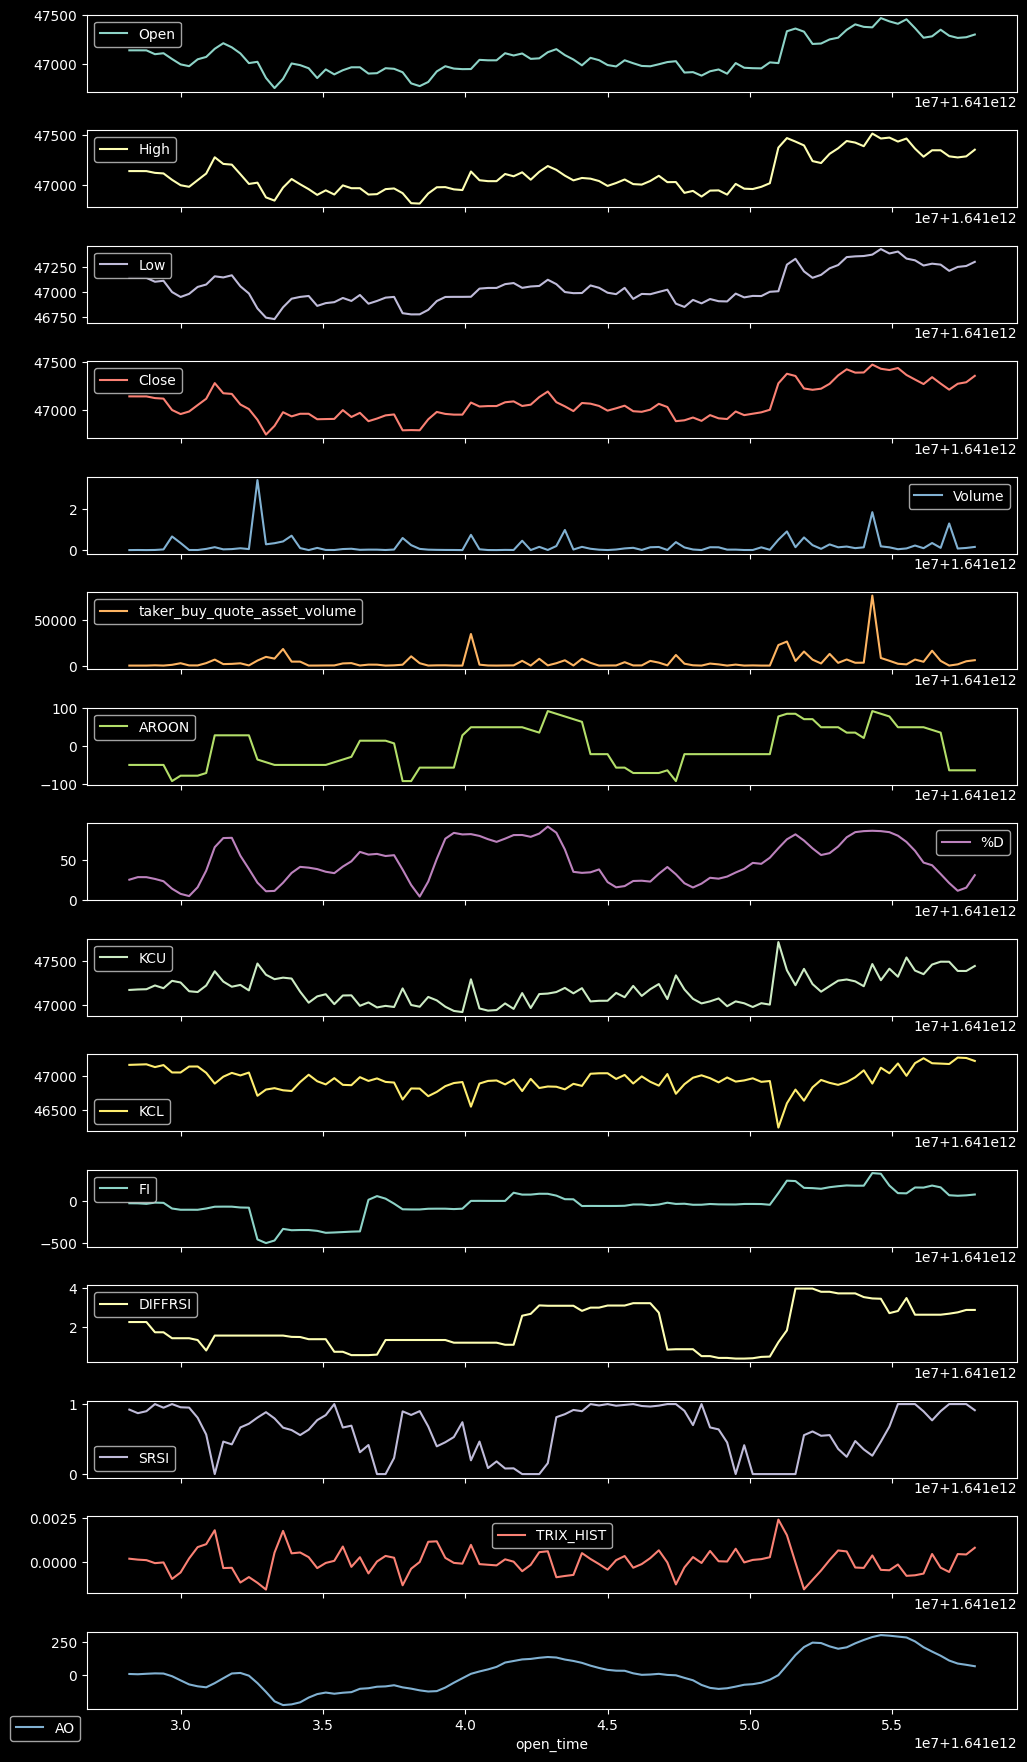

In [16]:
# Visual EDA, show subplots vertically
ax = data[:100].plot(subplots=True, layout=(len(data.columns), 1), figsize=(12, 22));
plt.subplots_adjust(hspace=0.5);
plt.legend(loc='upper right', bbox_to_anchor=(0,0), ncol=1);
data.head()
data.shape

#### Set up Environment

In [17]:
# Create the CryptoEnvironment instance
window_size = 10
env = CryptoEnvironment(observations=data, initial_value = 10000, window_size=window_size, order_fraction=0.66, trade_fee=0)

# Wrap the environment in a vectorized form
env = DummyVecEnv([lambda: env])
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


#### Create Agent

In [20]:
# Create the agent
model = PPO('MlpPolicy',env,verbose=1,n_steps=64,gamma=0.5,ent_coef=0.5, learning_rate = 0.0001,
            tensorboard_log="./tensorboard/CUSTOMENV_001")
model.save("./models/PPO/trading_model_orig.torch")

Using cpu device


#### Train Agent

In [24]:
# Train agent

for i in range(10000):
    model.use_rms_prop=False
    model.learn(total_timesteps=50000,reset_num_timesteps=False)
    model.save('./models/PPO/' + 'trading_model_chkpt_orig' + '.torch')
    testenv.evaluate(frame_length=200, render=True, model=model2, marker_size = 25, verbose=1);

Logging to ./tensorboard/CUSTOMENV_001\PPO_0
---------------------------
| time/              |    |
|    fps             | 72 |
|    iterations      | 1  |
|    time_elapsed    | 0  |
|    total_timesteps | 64 |
---------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 71            |
|    iterations           | 2             |
|    time_elapsed         | 1             |
|    total_timesteps      | 128           |
| train/                  |               |
|    approx_kl            | 0.00016878825 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.1          |
|    explained_variance   | -0.523        |
|    learning_rate        | 0.0001        |
|    loss                 | -0.419        |
|    n_updates            | 10            |
|    policy_gradient_loss | -0.0022       |
|    value_loss           | 0.3           |
-----------

KeyboardInterrupt: 

#### Evaluate Agent

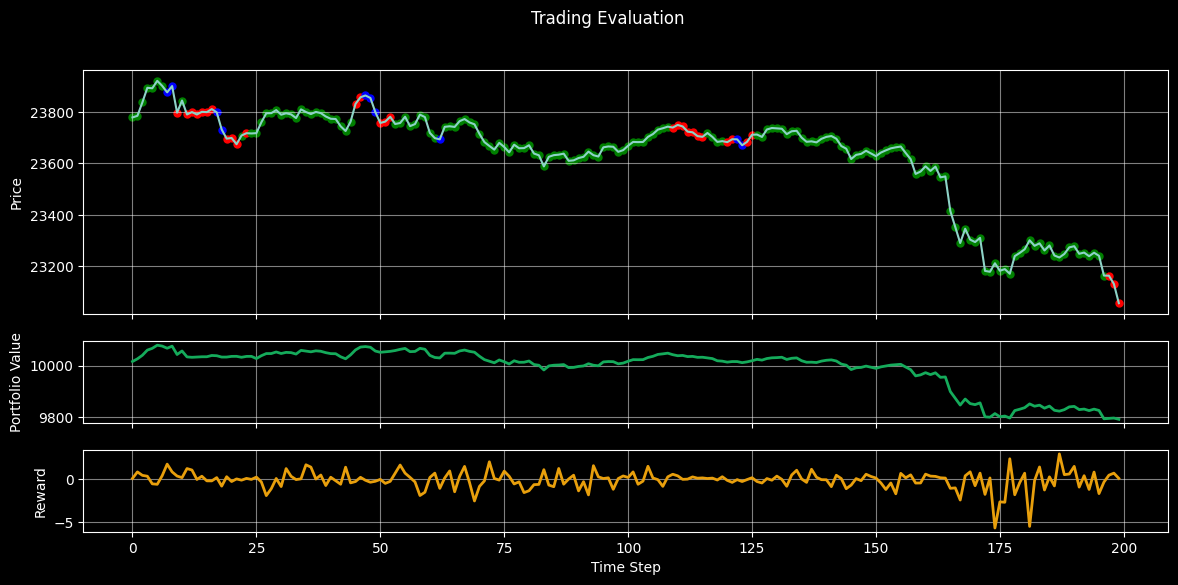

Evaluation Metrics:  
Initial balance:     10000.00
Final value:         9790.86
Profit:              -209.14
Return Rate:         -2.09%
Cumulative reward:   -16.92
Max reward:          2.96
Min reward:          -5.70


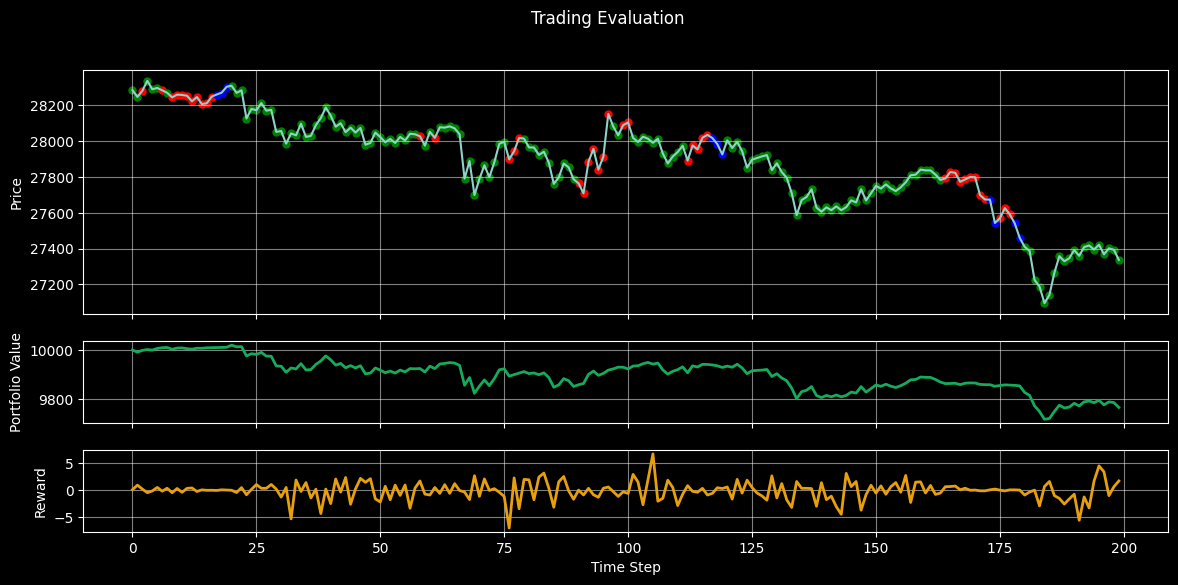

Evaluation Metrics:  
Initial balance:     10000.00
Final value:         9766.54
Profit:              -233.46
Return Rate:         -2.33%
Cumulative reward:   -22.46
Max reward:          6.63
Min reward:          -6.96


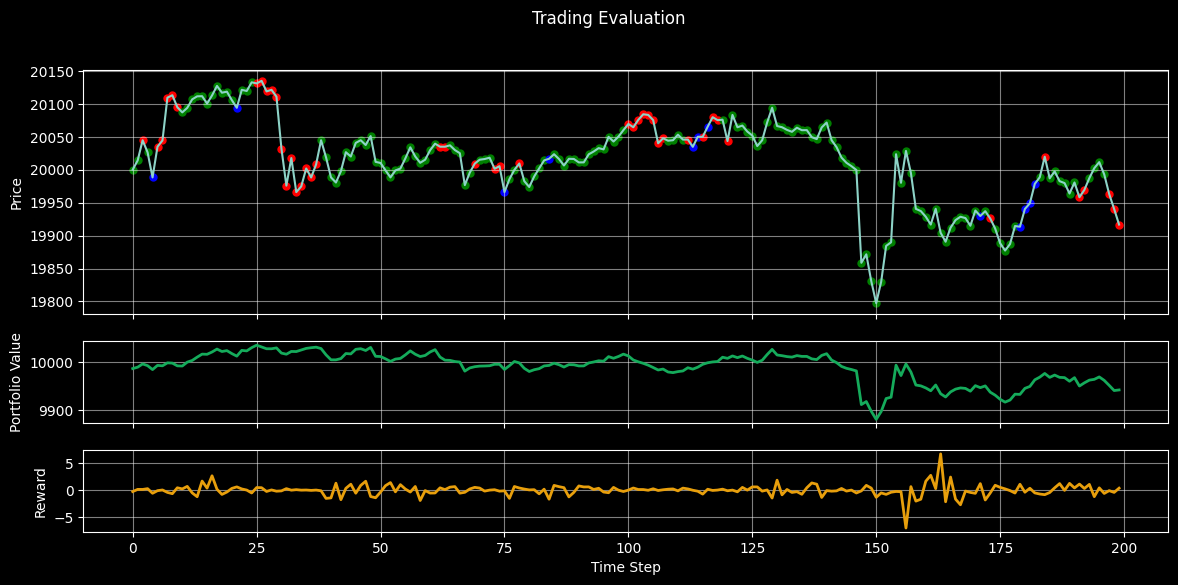

Evaluation Metrics:  
Initial balance:     10000.00
Final value:         9942.41
Profit:              -57.59
Return Rate:         -0.58%
Cumulative reward:   -2.12
Max reward:          6.72
Min reward:          -7.04


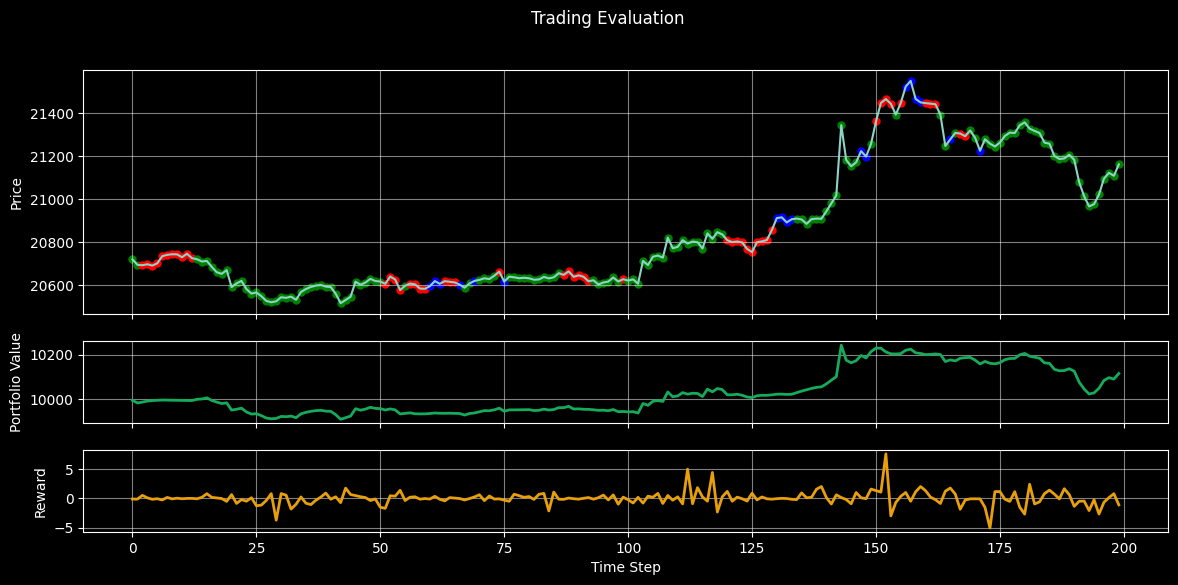

Evaluation Metrics:  
Initial balance:     10000.00
Final value:         10114.93
Profit:              114.93
Return Rate:         1.15%
Cumulative reward:   10.50
Max reward:          7.63
Min reward:          -5.07


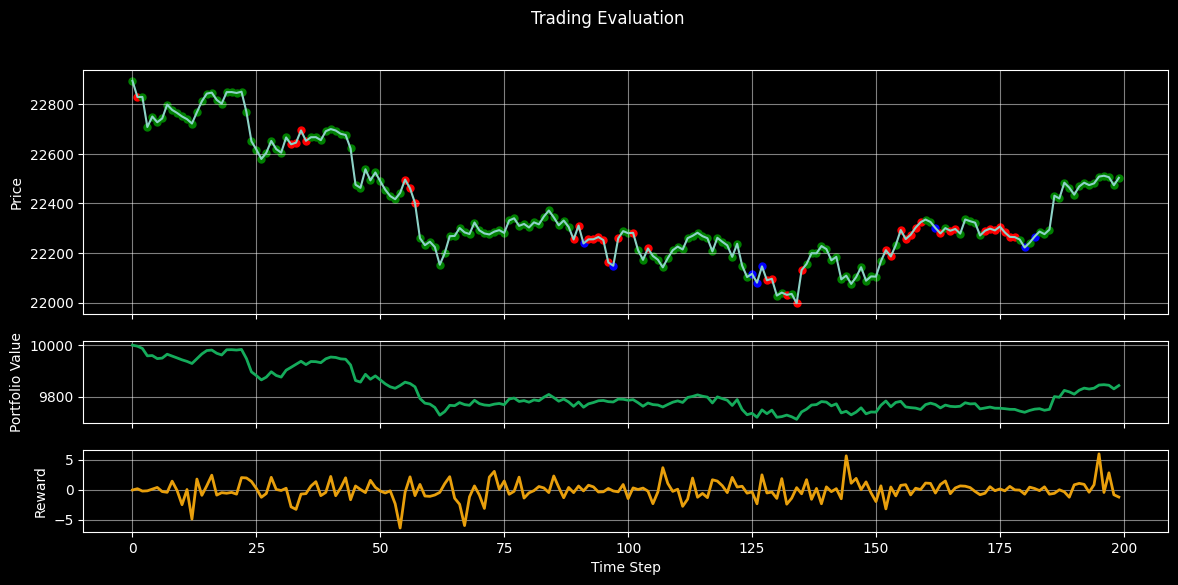

Evaluation Metrics:  
Initial balance:     10000.00
Final value:         9842.74
Profit:              -157.26
Return Rate:         -1.57%
Cumulative reward:   -13.54
Max reward:          5.94
Min reward:          -6.41


In [25]:

# Test the trained agent
# Parameters
for i in range(5):
    initial_value = 10000
    window_size = 10
    frame_length = 50  # Length of the evaluation subset

    # Create the CryptoEnvironment instance
    testenv = CryptoEnvironment(initial_value = 10000, observations = data, window_size=window_size, trade_fee=0)

    # Evaluate the model
    testenv.evaluate(frame_length=200, render=True, model=model, marker_size = 25, verbose=1);

In [23]:
data.head()

,Open,High,Low,Close,Volume,taker_buy_quote_asset_volume,AROON,%D,KCU,KCL,FI,DIFFRSI,SRSI,TRIX_HIST,AO
open_time,,,,,,,,,,,,,,,
1641028200000,47142.39,47142.39,47142.39,47142.39,0.000000,0.000000,-50.0,25.179543,47170.9185,47170.9185,-29.604093,2.268637,0.921130,0.000172,10.694618
1641028500000,47142.39,47142.39,47142.02,47142.02,0.003924,0.000000,-50.0,28.406955,47176.5515,47175.0715,-30.705597,2.268637,0.870136,0.000120,8.697912
1641028800000,47142.02,47142.02,47142.02,47142.02,0.000000,0.000000,-50.0,28.360903,47179.2515,47179.2515,-36.811017,2.268637,0.898510,0.000091,12.269794
1641029100000,47103.27,47124.42,47103.27,47124.42,0.006091,286.978747,-50.0,26.124242,47222.5195,47137.9195,-21.958556,1.749303,1.000000,-0.000079,15.217794
1641029400000,47112.96,47118.73,47112.96,47118.73,0.031840,0.000000,-50.0,23.225421,47190.9215,47167.8415,-24.834712,1.749303,0.948227,-0.000038,13.979676
